In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df=pd.read_csv('/Users/fantasy2fry/Documents/informatyczne/iadstudia/kolo_naukowe_data_science/Rekrutacja_2023/spaceship_titanic/dane.csv')
display(df)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


### Main idea of the project:
#### <span style="color:green">Find out what factors influence the decision of using cryosleep</span>
* I am interested in why people use cryosleep
* Maybe it is because of the destination?
* Maybe it is because of the planet they are from?
* Maybe it is because of the cabin they have?
* Maybe it is new type of spending time durring the travel?
* I think that CryoSleep is a new technology and people are not used to it yet. Or maybe it is controversial and people are afraid of it? I think it can be also something like abortion or euthanasia. Some people are against it and some people are for it.

/var/folders/7q/jtsqqb2j4bj4j9t6p9c76vw00000gn/T/ipykernel_12602/1704306655.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  in_cryosleep_and_bought_vip=df[df['CryoSleep']==1][df['VIP']==1].shape[0]
/var/folders/7q/jtsqqb2j4bj4j9t6p9c76vw00000gn/T/ipykernel_12602/1704306655.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  not_in_cryosleep_and_bought_vip=df[df['CryoSleep']==0][df['VIP']==1].shape[0]


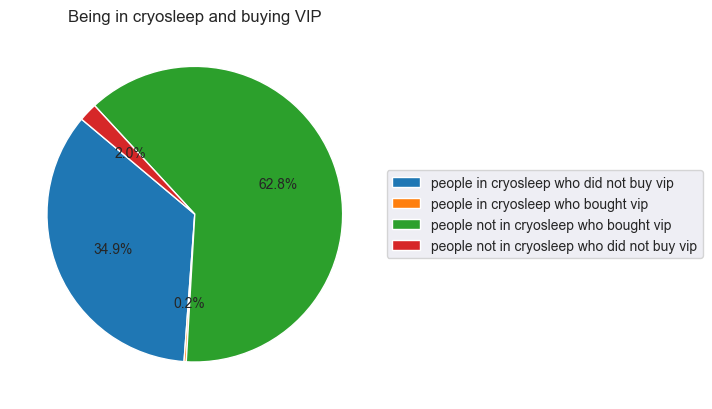

In [2]:
#Do more people travel being in cryosleep or not?
in_cryosleep=df[df['CryoSleep']==1].shape[0]
not_in_cryosleep=df[df['CryoSleep']==0].shape[0]
#How many people did buy VIP while being in cryosleep?
in_cryosleep_and_bought_vip=df[df['CryoSleep']==1][df['VIP']==1].shape[0]
#How many people did buy VIP while not being in cryosleep?
not_in_cryosleep_and_bought_vip=df[df['CryoSleep']==0][df['VIP']==1].shape[0]
labels= ['people in cryosleep who did not buy vip', 'people in cryosleep who bought vip', 'people not in cryosleep who bought vip', 'people not in cryosleep who did not buy vip']
plt.pie([in_cryosleep-in_cryosleep_and_bought_vip,in_cryosleep_and_bought_vip, not_in_cryosleep-in_cryosleep_and_bought_vip,not_in_cryosleep_and_bought_vip], autopct='%1.1f%%', startangle=140)
#plt.legend(labels, loc="best")
plt.legend(labels,  loc="center left", bbox_to_anchor=(1, 0.5))
plt.title('Being in cryosleep and buying VIP')
plt.show()

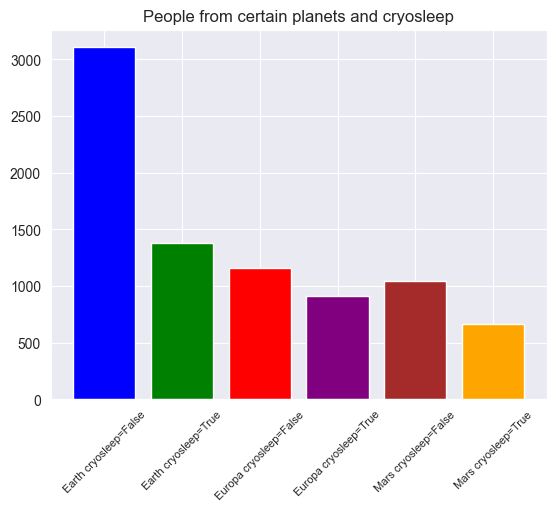

In [3]:
#Is cryosleep more popular among people from certain planets?
#Is there a correlation between the number of people from a planet and the number of people from that planet in cryosleep?
planets_and_cryosleep=df.groupby(['HomePlanet','CryoSleep']).size().reset_index(name='counts')
planets_and_cryosleep['HomePlanet and Cryosleep']=+planets_and_cryosleep['HomePlanet']+' cryosleep='+planets_and_cryosleep['CryoSleep'].astype(str)
planets_and_cryosleep=planets_and_cryosleep[['HomePlanet and Cryosleep','counts']]
colors = ['blue', 'green', 'red', 'purple','brown','orange']
plt.bar(planets_and_cryosleep['HomePlanet and Cryosleep'],planets_and_cryosleep['counts'], color=colors)
#plt.legend(planets_and_cryosleep['HomePlanet and Cryosleep'],  loc="center left", bbox_to_anchor=(1, 0.5))
plt.title('People from certain planets and cryosleep')
plt.xticks(rotation=45, fontsize=8)
plt.show()
#display(planets_and_cryosleep)

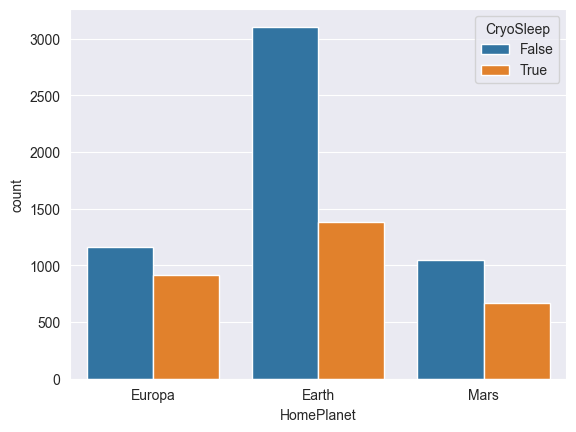

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


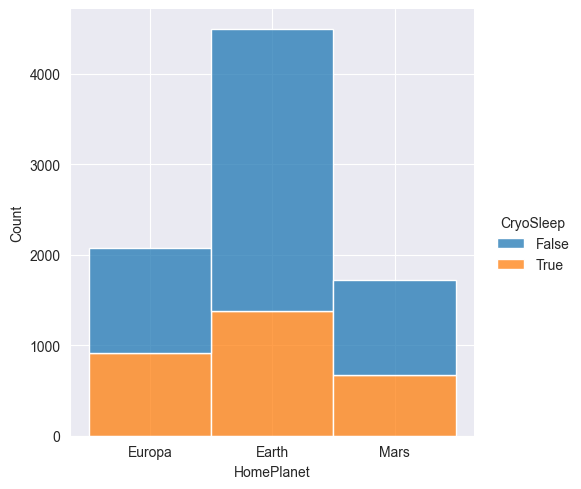

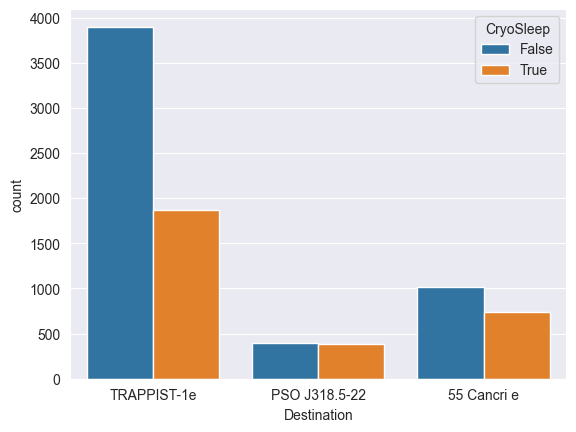

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


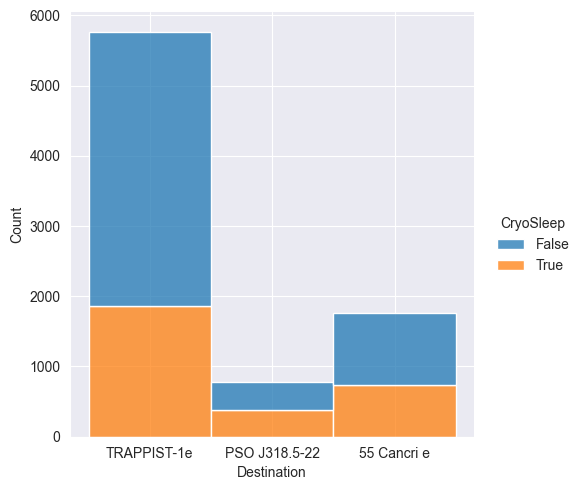

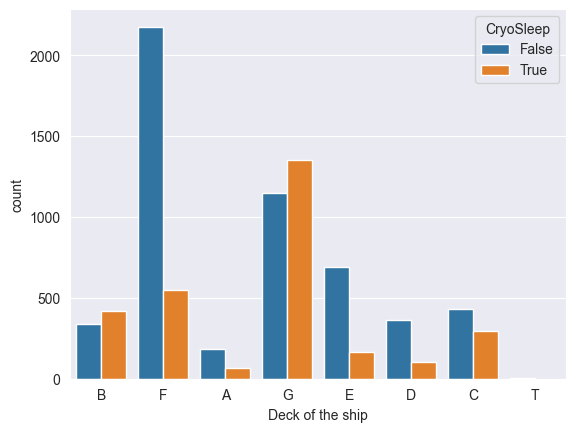

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


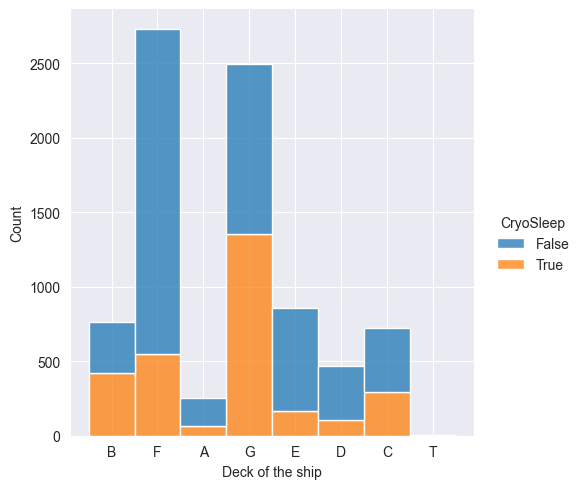

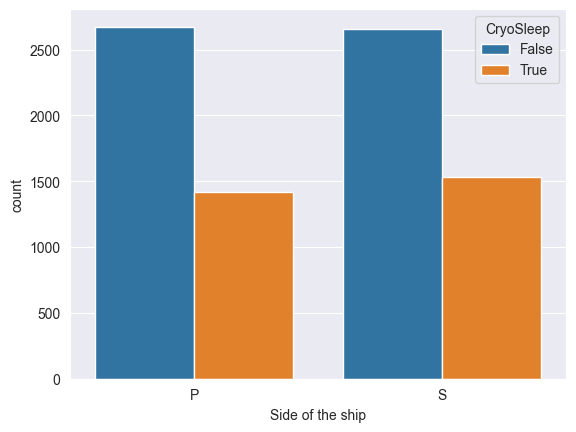

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


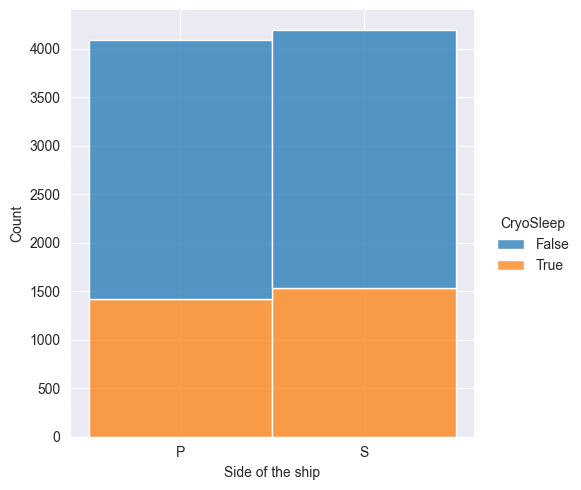

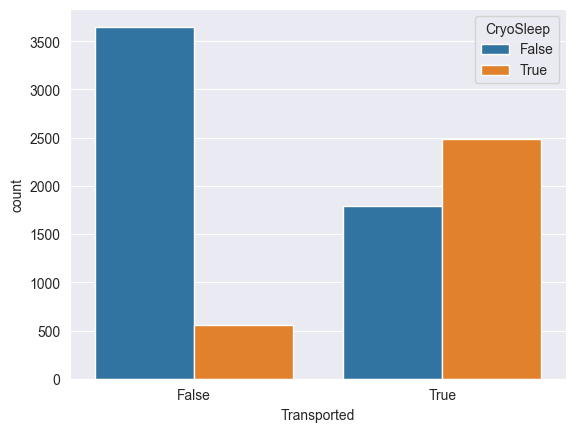

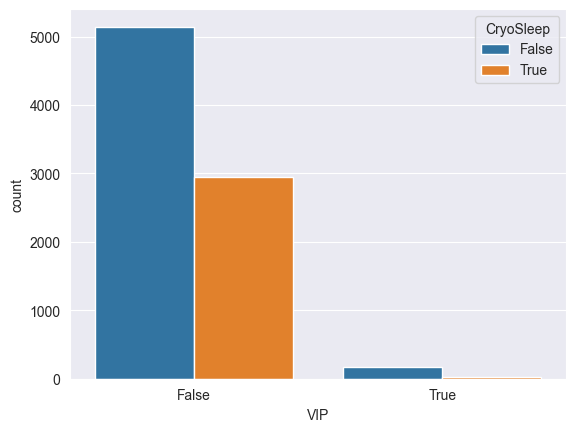

In [4]:
df2=df.copy()
df2[['Deck of the ship', 'Number of cabin', 'Side of the ship']] = df2['Cabin'].str.split('/', expand=True)
for col in ['HomePlanet', 'Destination', 'Deck of the ship', 'Side of the ship', 'Transported', 'VIP']:
    sns.countplot(x=col, hue='CryoSleep', data=df2)
    #sns.catplot(x=col, hue='CryoSleep', data=df2, kind='box')
    plt.show()
    if not(col == 'Transported' or col == 'VIP'):
        sns.displot(df2, x=col, hue="CryoSleep", multiple="stack")
        plt.show()
#display(df)

### Conclusions:
* Cryosleep is more popular among people from planet Europe and Mars
* People from Earth are more conservative and prefer not to use cryosleep
* Most Passengers are from Earth
* Most Passengers who use cryosleep were transported to another dimension
* Passengers who use cryosleep have cabin in totally random places around the spaceship
* Passengers who use cryosleep are less likely to buy VIP
* Destination of passenger does influence the decision of using cryosleep

In [5]:
df2.describe()
df2['Cost']=df2['RoomService']+df2['FoodCourt']+df2['ShoppingMall']+df2['Spa']+df2['VRDeck']
#age_groups=[18, 30, 50, 100]
#df['AgeGroup'] = pd.cut(df['Age'], bins=age_groups)
display(df2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck of the ship,Number of cabin,Side of the ship,Cost
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98,P,8536.0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S,0.0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500,S,1873.0
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608,S,4637.0


In [6]:
df2.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cost
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,7785.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,1484.601541
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189,2845.288241
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,736.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000,1486.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,35987.000000


/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


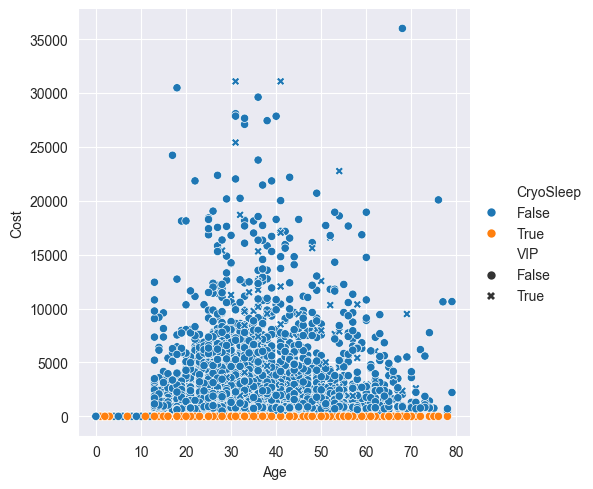

In [7]:
sns.relplot(data=df2,x="Age", y="Cost", hue="CryoSleep", style="VIP")
plt.show()

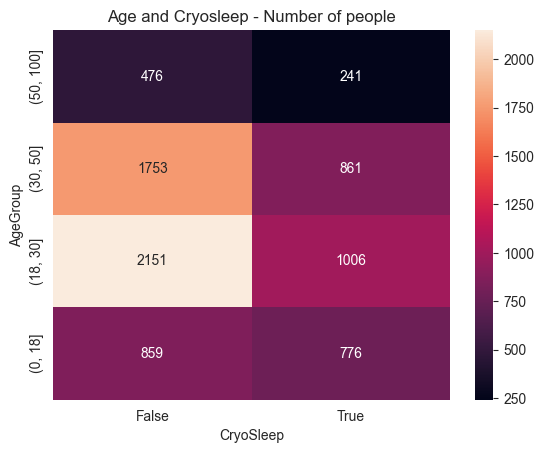

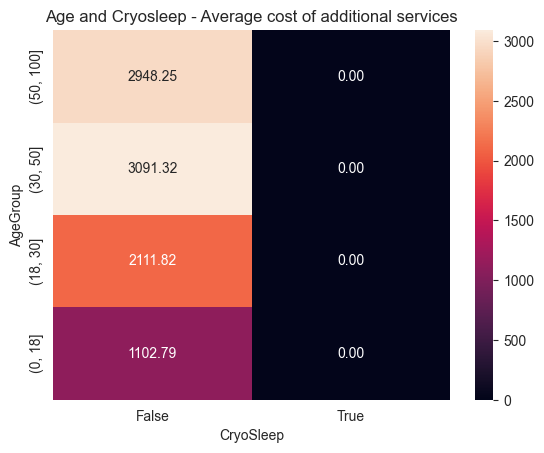

In [8]:
df2['AgeGroup'] = pd.cut(df2['Age'], bins=[0,18, 30, 50, 100])
#display(df2)
heatmapdf=df2.groupby('AgeGroup')['CryoSleep'].value_counts().unstack()
#display(heatmapdf)
sns.heatmap(heatmapdf.iloc[::-1], annot=True, fmt="d")
plt.title('Age and Cryosleep - Number of people')
plt.show()
heatmapdf=df2.groupby(['AgeGroup', 'CryoSleep'])['Cost'].mean().unstack()
#display(heatmapdf)
sns.heatmap(heatmapdf.iloc[::-1], annot=True, fmt=".2f")
plt.title('Age and Cryosleep - Average cost of additional services')
plt.show()

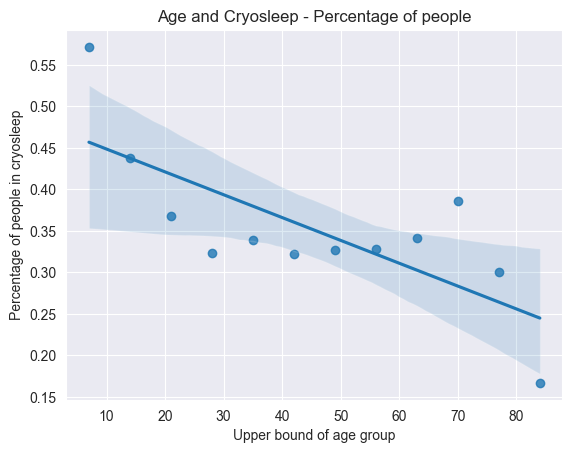

In [9]:
bins=[i for i in range(0,85,7)]
df2['AgeGroup']=pd.cut(df2['Age'], bins=bins)
#display(df2)
regplotdf=df2.groupby('AgeGroup')['CryoSleep'].value_counts().unstack()
#regplotdf.describe()
regplotdf['Number of people in age group']=regplotdf.apply(lambda row: row[0]+row[1], axis=1)
regplotdf['Percentage of people in cryosleep']=regplotdf.apply(lambda row: row[1]/row[2], axis=1)
regplotdf.reset_index(level=0, inplace=True)
regplotdf['AgeGroup']=[i for i in range(7,85,7)]
#display(regplotdf)
sns.regplot(data=regplotdf, x='AgeGroup' , y="Percentage of people in cryosleep")
plt.title('Age and Cryosleep - Percentage of people')
plt.xlabel("Upper bound of age group")
plt.show()

### Conclusions - Cryosleep, Cost and Age:
* Traveling in cryosleep is more popular among younger people
* Traveling in cryosleep equals no additional cost
* People around 70 years old are more likely to travel in cryosleep than people around 60 years old, maybe because they are more afraid of death? And want to live longer?